In [ ]:
import os
import numpy as np                                         # Imports NumPy, a library for numerical computations in Python, useful for handling arrays and performing mathematical operations.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split       #Imports a function to split datasets into training and testing sets for model evaluation.
from sklearn.preprocessing import StandardScaler           #Imports a class to standardize features by removing the mean and scaling to unit variance.
from sklearn.decomposition import PCA                      #Imports Principal Component Analysis (PCA) for dimensionality reduction.
from sklearn.svm import SVC                                #Imports Support Vector Classification (SVC), a machine learning model for classification tasks.
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img   #Imports functions from TensorFlow/Keras for image preprocessing, including data augmentation and image conversion.

In [ ]:
base_dir = 'drive/MyDrive/brain/Training'
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']

In [ ]:
# Load images and labels
import os
data = []
labels = []

for category in categories:
    path = os.path.join(base_dir, category)                       #Constructs the path to the directory of the current category.
    class_num = categories.index(category)                        #Assigns a numeric label to each category based on its position in the categories list.
    if not os.path.exists(path):                                  #Checks if the directory for the current category exists. If not, it prints an error message and skips to the next category.
        print(f"Directory {path} does not exist!")
        continue
    class_num = categories.index(category)
    for img in os.listdir(path):                                   #Loops through all images in the current category directory.
        try:
            img_array = load_img(os.path.join(path, img), target_size=(64, 64))     # Resize images. Loads and resizes each image to 64x64 pixels.
            img_array = img_to_array(img_array)                                     #Converts the image to a NumPy array.
            data.append(img_array)                                                  #Appends the image array and its label to the data and labels lists, respectively.
            labels.append(class_num)
        except Exception as e:                                                      #Catches and prints any errors encountered during image loading.
            print(f"Error loading image: {e}")

# Convert lists to numpy arrays
data = np.array(data, dtype='float32')
labels = np.array(labels)

In [ ]:
label_counts=np.bincount(labels)                                           #Counts the number of occurrences of each label in the labels array.
for i, category in enumerate(categories):
    print(f"Number of images in category '{category}': {label_counts[i]}")

Number of images in category 'glioma': 1321
Number of images in category 'meningioma': 1339
Number of images in category 'notumor': 1622
Number of images in category 'pituitary': 1462


In [ ]:
# Normalize data
data /= 255.0
#Normalizes the image data by scaling pixel values to the range [0, 1].
#This is done by dividing each pixel value by 255, which is the maximum pixel value for an 8-bit image.

from sklearn.model_selection import StratifiedShuffleSplit
# a class for splitting data into training and testing sets while preserving the proportion of each class label.

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
# Flatten the images for PCA
# flattens the test images of 2D arrays into 1D arrays.
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train_flat = scaler.fit_transform(X_train_flat)  #This standardizes the training data by removing the mean and scaling to unit variance.
X_test_flat = scaler.transform(X_test_flat)

In [ ]:
# Apply PCA
pca = PCA(n_components=50)  # Number of principal components to keep.This means PCA will reduce the data to 50 dimensions.
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

In [ ]:
# Train SVM model
svm = SVC(kernel='linear', C=1)

#The c parameter is set to 1, which controls the regularization strength.
#A smaller c value makes the model more regularized, while a larger c value allows it to fit the training data more closely.

svm.fit(X_train_pca, y_train)

SVC(C=1, kernel='linear')

In [ ]:
# Predict on test data
y_pred = svm.predict(X_test_pca)

In [ ]:
unique_classes=np.unique(y_test)                                #Finds the unique class labels in the test data (y_test).
unique_classes_names=[categories[i] for i in unique_classes]    #Maps the unique class indices to their corresponding category names using the categories list.

In [ ]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=unique_classes_names))

Classification Report:
              precision    recall  f1-score   support

      glioma       0.82      0.79      0.81       284
  meningioma       0.66      0.64      0.65       259
     notumor       0.86      0.87      0.86       298
   pituitary       0.88      0.93      0.91       308

    accuracy                           0.81      1149
   macro avg       0.81      0.81      0.81      1149
weighted avg       0.81      0.81      0.81      1149



In [ ]:
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Accuracy Score:
0.8137510879025239


In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

def preprocess_image(image_path, target_size=(64, 64)):        #Loads the image from the specified path and resizes it to 64x64 pixels.
    """Load and preprocess a single image."""
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)                             #Converts the image to a NumPy array.
    img_array = img_array / 255.0  # Normalize
    img_array = img_array.reshape(1, -1)  # Flatten and reshape for the model
    img_array = scaler.transform(img_array)  # Apply the same scaler used during training
    img_array = pca.transform(img_array)  # Apply PCA transformation
    return img_array

def predict_image(model, image_array, categories):
    """Predict the class of a single image."""
    prediction = model.predict(image_array)
    class_idx = prediction[0]
    return categories[class_idx]

# Path to the image you want to test
test_image_path = 'drive/MyDrive/brain/Training/meningioma/Tr-meTr_0003.jpg'

# Preprocess the image
test_image_array = preprocess_image(test_image_path)

# Predict the class of the image
predicted_class = predict_image(svm, test_image_array, categories)

print(f"The predicted class for the test image is: {predicted_class}")

# Display the image
display_image(test_image_path)

The predicted class for the test image is: meningioma


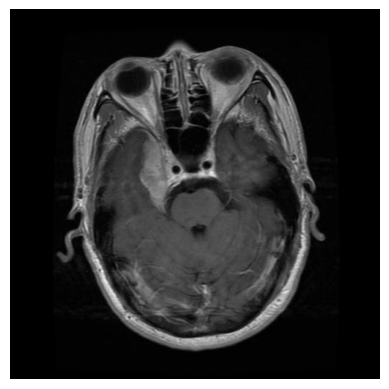

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(64, 64)):
    """Load and preprocess a single image."""
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = img_array.reshape(1, -1)  # Flatten and reshape for the model
    img_array = scaler.transform(img_array)  # Apply the same scaler used during training
    img_array = pca.transform(img_array)  # Apply PCA transformation
    return img_array

def predict_image(model, image_array, categories):
    """Predict the class of a single image."""
    prediction = model.predict(image_array)
    class_idx = prediction[0]
    return categories[class_idx]

def display_image(image_path):
    """Display the image using Matplotlib."""
    img = load_img(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Path to the image you want to test
test_image_path = 'drive/MyDrive/brain/Training/meningioma/Tr-meTr_0003.jpg'

# Preprocess the image
test_image_array = preprocess_image(test_image_path)

# Predict the class of the image
predicted_class = predict_image(svm, test_image_array, categories)

# Print the predicted class
print(f"The predicted class for the test image is: {predicted_class}")

# Display the image
display_image(test_image_path)


The predicted class for the test image is: meningioma
Displaying image with true label...


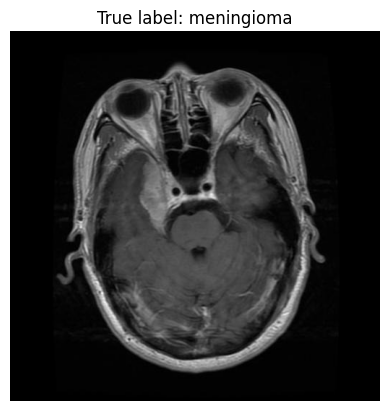

Displaying image with predicted label...


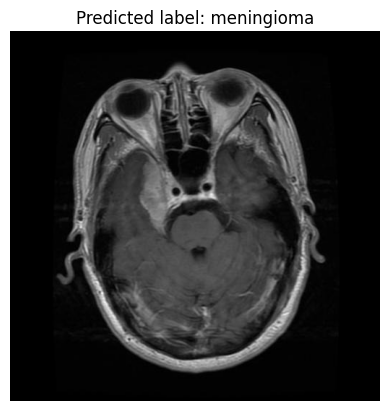

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(image_path, target_size=(64, 64)):
    """Load and preprocess a single image."""
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = img_array / 255.0  # Normalize
    img_array = img_array.reshape(1, -1)  # Flatten and reshape for the model
    img_array = scaler.transform(img_array)  # Apply the same scaler used during training
    img_array = pca.transform(img_array)  # Apply PCA transformation
    return img_array

def predict_image(model, image_array, categories):
    """Predict the class of a single image."""
    prediction = model.predict(image_array)
    class_idx = prediction[0]
    return categories[class_idx]

def display_image_with_label(image_path, label):
    """Display the image with its label using Matplotlib."""
    img = load_img(image_path)
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')  # Hide axes
    plt.show()

# Path to the image you want to test
test_image_path = 'drive/MyDrive/brain/Training/meningioma/Tr-meTr_0003.jpg'

# True label for the image
true_label = 'meningioma'  # Adjust this to the actual label

# Preprocess the image
test_image_array = preprocess_image(test_image_path)

# Predict the class of the image
predicted_class = predict_image(svm, test_image_array, categories)

# Print the predicted class
print(f"The predicted class for the test image is: {predicted_class}")

# Display the image with the true label
print("Displaying image with true label...")
display_image_with_label(test_image_path, f"True label: {true_label}")

# Display the image with the predicted label
print("Displaying image with predicted label...")
display_image_with_label(test_image_path, f"Predicted label: {predicted_class}")


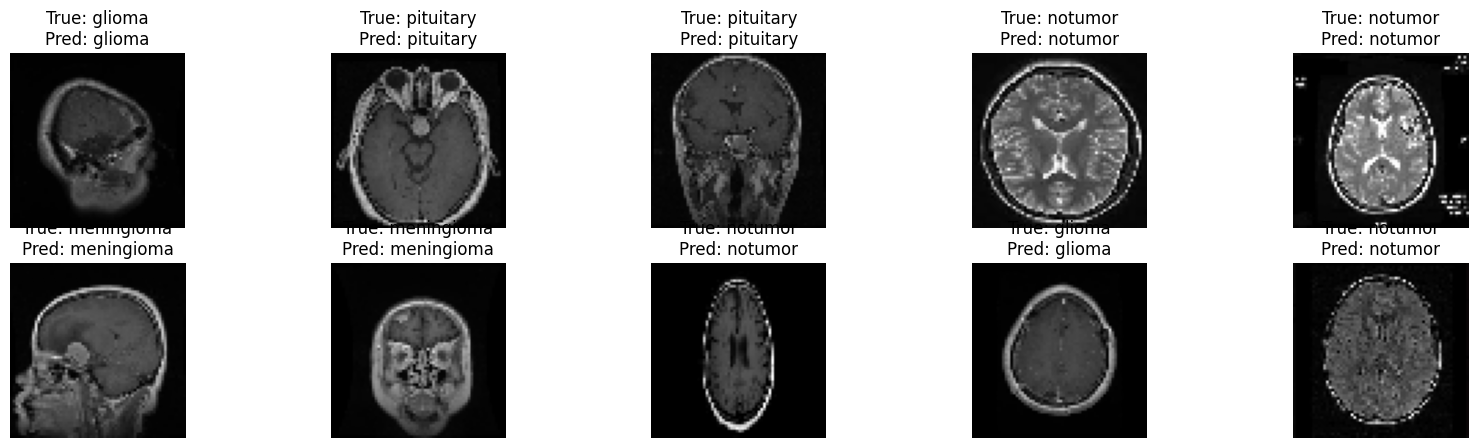

In [ ]:
def plot_sample_images(original_images, labels, predictions, le, num_samples=10):
    plt.figure(figsize=(20, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)

        img = original_images[i].reshape(64, 64, 3)
        plt.imshow(img)
        plt.title(f"True: {le.inverse_transform([labels[i]])[0]}\nPred: {le.inverse_transform([predictions[i]])[0]}")
        plt.axis('off')
    plt.show()

# Plot sample images with true and predicted labels
plot_sample_images(X_test, y_test, y_pred, le, num_samples=10)
